In [48]:
## loading datasets
import pandas as pd

target_df = pd.read_csv('target.csv', encoding='ISO-8859-1')
walmart_df = pd.read_csv('walmart.csv', encoding='ISO-8859-1')
census_df = pd.read_csv('county.csv')

print(len(walmart_df))
# walmart_df.head()
# census_df.head()

4654


## getting population density

In [49]:
popden_df = pd.read_csv('popden.csv')
popden_df.head()
last_word = popden_df['GCT_STUB.display-label'].str.split(" ").str[-1]
print(len(list(set(last_word)))) # number of unique last_word
print(set(last_word))

## if the last word is 'County' remove replace county from the string
for index, value in enumerate(popden_df['GCT_STUB.display-label'].values):
    if value[-6:] == 'County':
        value = value[:-7]
        popden_df['GCT_STUB.display-label'].values[index] = value
popden_df

9
{'Parish', 'County', 'City', 'Municipio', 'Columbia', 'Municipality', 'Borough', 'Area', 'city'}


,GEO.id,GEO.id2,GEO.display-label,GCT_STUB.target-geo-id,GCT_STUB.target-geo-id2,GCT_STUB.display-label,Density per square mile of land area
0,0400000US01,1,Alabama,0500000US01001,1001,Autauga,91.8
1,0400000US01,1,Alabama,0500000US01003,1003,Baldwin,114.6
2,0400000US01,1,Alabama,0500000US01005,1005,Barbour,31.0
3,0400000US01,1,Alabama,0500000US01007,1007,Bibb,36.8
4,0400000US01,1,Alabama,0500000US01009,1009,Blount,88.9
...,...,...,...,...,...,...,...
3216,0400000US72,72,Puerto Rico,0500000US72145,72145,Vega Baja Municipio,1301.1
3217,0400000US72,72,Puerto Rico,0500000US72147,72147,Vieques Municipio,183.2
3218,0400000US72,72,Puerto Rico,0500000US72149,72149,Villalba Municipio,731.6
3219,0400000US72,72,Puerto Rico,0500000US72151,72151,Yabucoa Municipio,687.2


In [50]:
not_in = []
for index, value in enumerate(target_df['Address.County'].values):
    if value not in popden_df['GCT_STUB.display-label'].values:
        not_in.append(value)

print(not_in) # number of unique not_in)
# popden_df['GCT_STUB.display-label'].values

['Anchorage Borough', 'Anchorage Borough', 'Dona Ana', 'LOS ANGELES', nan, 'PA - Pennsylvania', 'Baltimore City', 'Alexandria', 'Winchester City', 'Fredericksburg City', 'Richmond City', 'Newport News City', 'Hampton City', 'Harrisonburg City', 'Virginia Beach City', 'Norfolk City', 'Virginia Beach City', 'Virginia Beach City', 'Virginia Beach City', 'Chesapeake', 'Chesapeake', 'Colonial Heights City', 'Chesapeake', 'Waynesboro City', 'Lynchburg City', 'Dekalb', 'Fond Du Lac', 'Mclean', 'Dupage', 'Dupage', 'Dupage', 'Dupage', 'Dupage', 'Dupage', 'Dupage', 'Dupage', 'Dupage', 'Roanoke City', 'Danville City']


In [52]:
complete_df = popden_df.merge(target_df, how="left", left_on=["GCT_STUB.display-label"], right_on=["Address.County"])
len(complete_df)

target_df['Address.County'] = target_df['Address.County'].str.strip().str.lower()
popden_df['GCT_STUB.display-label'] = popden_df['GCT_STUB.display-label'].str.strip().str.lower()

merged_df = pd.merge(target_df, popden_df, left_on='Address.County', right_on='GCT_STUB.display-label', how='left')

print(merged_df.head())


  X.locale Address.AddressLine1 Address.AddressLine2   Address.City  \
0    en-US      1901 13th Ave E                  NaN     Tuscaloosa   
1    en-US     2929 Watson Blvd                  NaN  Warner Robins   
2    en-US     2929 Watson Blvd                  NaN  Warner Robins   
3    en-US     2929 Watson Blvd                  NaN  Warner Robins   
4    en-US     2929 Watson Blvd                  NaN  Warner Robins   

  Address.CountryName Address.County  \
0       United States     tuscaloosa   
1       United States        houston   
2       United States        houston   
3       United States        houston   
4       United States        houston   

                         Address.FormattedAddress  \
0      1901 13th Ave E, Tuscaloosa, AL 35404-4785   
1  2929 Watson Blvd, Warner Robins, GA 31093-9600   
2  2929 Watson Blvd, Warner Robins, GA 31093-9600   
3  2929 Watson Blvd, Warner Robins, GA 31093-9600   
4  2929 Watson Blvd, Warner Robins, GA 31093-9600   

     Address.

In [53]:
popden_df = popden_df.drop_duplicates(subset=['GCT_STUB.display-label'])

merged_df = pd.merge(target_df, popden_df, left_on='Address.County', right_on='GCT_STUB.display-label', how='left')

print(merged_df.shape)

(1780, 54)


In [54]:
## replace NaN with 0
complete_df = merged_df
complete_df['Density per square mile of land area'] = complete_df['Density per square mile of land area'].fillna(0)

In [11]:
%matplotlib inline

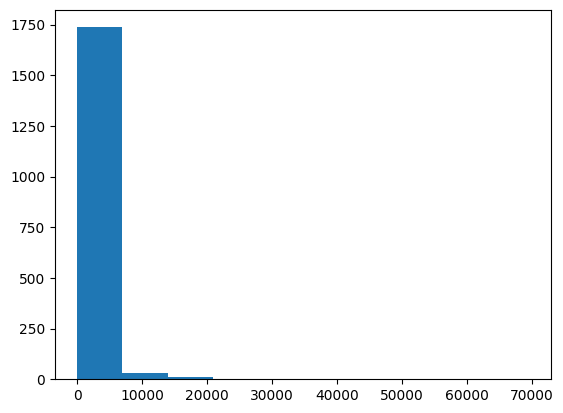

In [55]:
## create a histogram of all of the population densities
import matplotlib.pyplot as plt
plt.hist(complete_df['Density per square mile of land area'])
plt.savefig('histogram.png')

In [56]:
complete_df['Density per square mile of land area'].describe()

count     1780.000000
mean      1177.393146
std       3377.117972
min          0.000000
25%         75.800000
50%        405.600000
75%       1344.900000
max      69468.400000
Name: Density per square mile of land area, dtype: float64

In [57]:
# complete_df[complete_df['Density per square mile of land area'] == 0]
# drop all rows with 0 in the column 'Density per square mile of land area'
new_df = complete_df[complete_df['Density per square mile of land area'] != 0]

new_df['Density per square mile of land area'].describe()

count     1771.000000
mean      1183.376510
std       3384.646565
min          0.300000
25%         75.800000
50%        407.700000
75%       1345.500000
max      69468.400000
Name: Density per square mile of land area, dtype: float64

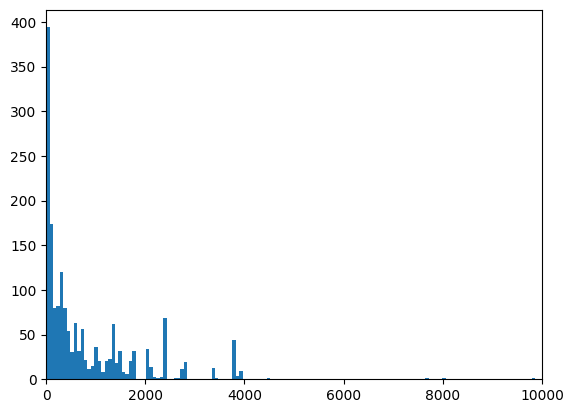

In [58]:
plt.hist(new_df['Density per square mile of land area'], bins=1000)
plt.xlim(0, 10000)
plt.savefig('histogram.png')  # Save the plot as an image

In [59]:
def classify_area(density):
    if density > 800:
        return 'Urban'
    elif 80 <= density <= 800:
        return 'Suburban'
    else:
        return 'Rural'


new_df['AreaType'] = new_df['Density per square mile of land area'].apply(classify_area)

# print(new_df[['Density per square mile of land area', 'AreaType']].head())


new_df['AreaType'].value_counts()

C:\Users\avikm\AppData\Local\Temp\ipykernel_30456\1738909184.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['AreaType'] = new_df['Density per square mile of land area'].apply(classify_area)


AreaType
Suburban    724
Urban       592
Rural       455
Name: count, dtype: int64

In [60]:
new_df.to_csv('target_final.csv')

## Walmart

In [61]:
walmart_df.shape

(4654, 22)

In [62]:
zip_county = pd.read_csv('zip_county.csv')
zip_county.head()

,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,36003,Autauga County,AL,1001,H1
1,36006,Autauga County,AL,1001,H1
2,36067,Autauga County,AL,1001,H1
3,36066,Autauga County,AL,1001,H1
4,36703,Autauga County,AL,1001,H1


In [63]:
df2_deduplicated = zip_county.drop_duplicates(subset='ZIP')

merged_df = pd.merge(walmart_df, df2_deduplicated, left_on='zip_code', right_on='ZIP', how='left')
merged_df = merged_df.drop(columns=['ZIP'])
merged_df.head()

,name,url,street_address,city,state,zip_code,country,phone_number_1,phone_number_2,fax_1,...,longitude,facebook,twitter,instagram,pinterest,youtube,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,Conway Supercenter,https://www.walmart.com/store/5/conway-ar/details,1155 Hwy 65 North,Conway,AR,72032,US,501-329-0023,NaN,NaN,...,-92.436905,NaN,NaN,NaN,NaN,NaN,Faulkner County,AR,5045,H1
1,Sikeston Supercenter,https://www.walmart.com/store/9/sikeston-mo/de...,1303 S Main St,Sikeston,MO,63801,US,573-472-3020,NaN,NaN,...,-89.586051,NaN,NaN,NaN,NaN,NaN,Mississippi County,MO,29133,H1
2,Tahlequah Supercenter,https://www.walmart.com/store/10/tahlequah-ok/...,2020 S Muskogee Ave,Tahlequah,OK,74464,US,918-456-8804,NaN,NaN,...,-94.979859,NaN,NaN,NaN,NaN,NaN,Cherokee County,OK,40021,H1
3,Mountain Home Supercenter,https://www.walmart.com/store/11/mountain-home...,65 Wal Mart Dr,Mountain Home,AR,72653,US,870-492-9299,NaN,NaN,...,-92.341026,NaN,NaN,NaN,NaN,NaN,Baxter County,AR,5005,H1
4,Claremore Supercenter,https://www.walmart.com/store/12/claremore-ok/...,1500 S Lynn Riggs Blvd,Claremore,OK,74017,US,918-341-2765,NaN,NaN,...,-95.627125,NaN,NaN,NaN,NaN,NaN,Rogers County,OK,40131,H1


In [64]:
for index, value in enumerate(merged_df['COUNTYNAME'].values):
    if value[-6:] == 'County':
        value = value[:-7]
        merged_df['COUNTYNAME'].values[index] = value
merged_df

,name,url,street_address,city,state,zip_code,country,phone_number_1,phone_number_2,fax_1,...,longitude,facebook,twitter,instagram,pinterest,youtube,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,Conway Supercenter,https://www.walmart.com/store/5/conway-ar/details,1155 Hwy 65 North,Conway,AR,72032,US,501-329-0023,NaN,NaN,...,-92.436905,NaN,NaN,NaN,NaN,NaN,Faulkner,AR,5045,H1
1,Sikeston Supercenter,https://www.walmart.com/store/9/sikeston-mo/de...,1303 S Main St,Sikeston,MO,63801,US,573-472-3020,NaN,NaN,...,-89.586051,NaN,NaN,NaN,NaN,NaN,Mississippi,MO,29133,H1
2,Tahlequah Supercenter,https://www.walmart.com/store/10/tahlequah-ok/...,2020 S Muskogee Ave,Tahlequah,OK,74464,US,918-456-8804,NaN,NaN,...,-94.979859,NaN,NaN,NaN,NaN,NaN,Cherokee,OK,40021,H1
3,Mountain Home Supercenter,https://www.walmart.com/store/11/mountain-home...,65 Wal Mart Dr,Mountain Home,AR,72653,US,870-492-9299,NaN,NaN,...,-92.341026,NaN,NaN,NaN,NaN,NaN,Baxter,AR,5005,H1
4,Claremore Supercenter,https://www.walmart.com/store/12/claremore-ok/...,1500 S Lynn Riggs Blvd,Claremore,OK,74017,US,918-341-2765,NaN,NaN,...,-95.627125,NaN,NaN,NaN,NaN,NaN,Rogers,OK,40131,H1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649,Pearland Neighborhood Market,https://www.walmart.com/store/7361/pearland-tx...,12631 Broadway Street,Pearland,TX,77584,US,713-570-7925,NaN,NaN,...,-95.415783,NaN,NaN,NaN,NaN,NaN,Brazoria,TX,48039,H1
4650,Bentonville Gas Station,https://www.walmart.com/store/7368/bentonville...,1300 S Walton Blvd,Bentonville,AR,72712,US,479-271-2209,NaN,NaN,...,-94.214669,NaN,NaN,NaN,NaN,NaN,Benton,AR,5007,H1
4651,Millcreek Pickup only,https://www.walmart.com/store/8855/millcreek-u...,3701 S Highland Dr,Millcreek,UT,84106,US,801-467-2882,NaN,NaN,...,-111.846529,NaN,NaN,NaN,NaN,NaN,Salt Lake,UT,49035,H1
4652,Dallas Supercenter,https://www.walmart.com/store/8930/dallas-tx/d...,15757 Coit Rd,Dallas,TX,75248,US,972-235-0681,NaN,NaN,...,-96.770294,NaN,NaN,NaN,NaN,NaN,Collin,TX,48085,H1


In [65]:
merged_df['COUNTYNAME'] = merged_df['COUNTYNAME'].str.strip().str.lower()
popden_df['GCT_STUB.display-label'] = popden_df['GCT_STUB.display-label'].str.strip().str.lower()


new_df = pd.merge(merged_df, popden_df, left_on='COUNTYNAME', right_on='GCT_STUB.display-label', how='left')

new_df.head(1)

C:\Users\avikm\AppData\Local\Temp\ipykernel_30456\3583224825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popden_df['GCT_STUB.display-label'] = popden_df['GCT_STUB.display-label'].str.strip().str.lower()


,name,url,street_address,city,state,zip_code,country,phone_number_1,phone_number_2,fax_1,...,STATE,STCOUNTYFP,CLASSFP,GEO.id,GEO.id2,GEO.display-label,GCT_STUB.target-geo-id,GCT_STUB.target-geo-id2,GCT_STUB.display-label,Density per square mile of land area
0,Conway Supercenter,https://www.walmart.com/store/5/conway-ar/details,1155 Hwy 65 North,Conway,AR,72032,US,501-329-0023,NaN,NaN,...,AR,5045,H1,0400000US05,5.0,Arkansas,0500000US05045,5045.0,faulkner,174.8


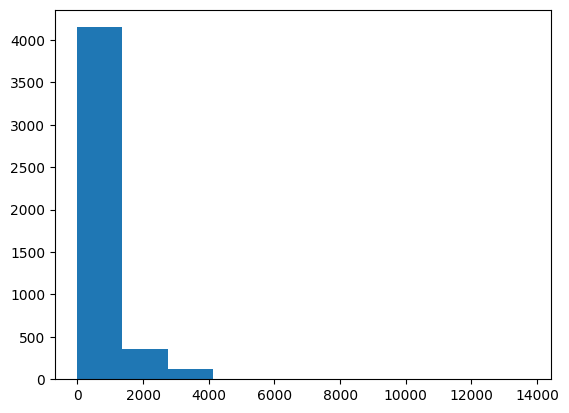

In [66]:
plt.hist(new_df['Density per square mile of land area'])
plt.savefig('histogram.png')

In [67]:
new_df['Density per square mile of land area'].describe()

count     4650.000000
mean       492.593161
std       1000.263277
min          0.300000
25%         41.800000
50%        137.300000
75%        492.100000
max      13731.400000
Name: Density per square mile of land area, dtype: float64

In [68]:
def classify_area(density):
    if density > 800:
        return 'Urban'
    elif 80 <= density <= 800:
        return 'Suburban'
    else:
        return 'Rural'


new_df['AreaType'] = new_df['Density per square mile of land area'].apply(classify_area)

# print(new_df[['Density per square mile of land area', 'AreaType']].head())


new_df['AreaType'].value_counts()

AreaType
Suburban    1993
Rural       1881
Urban        780
Name: count, dtype: int64

In [69]:
new_df.to_csv('walmart_final.csv')